In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import FinanceDataReader as fdr
import openpyxl

In [2]:
start = '2025-11-01'
end = '2026-02-01'

In [3]:
# KOSPI Close Price Weekly Return
kospi = fdr.DataReader('KS11')['Close']

kospi_prices = kospi.loc[start:end]

weekly_return1 = kospi_prices.pct_change(periods=5)[5:] * 100 

In [4]:
def RS_week(ticker):
        try:
                asset_prices = fdr.DataReader(ticker,start,end)['Close']
                
                weekly_return2 = asset_prices.pct_change(periods=5)[5:] * 100

                RS = weekly_return2 - weekly_return1
                
                return RS
        except:
                asset_prices = fdr.DataReader(f'YAHOO:{ticker}.KS',start,end)['Close']

                weekly_return2 = asset_prices.pct_change(periods=5)[5:] * 100

                RS = weekly_return2 - weekly_return1
                
                return RS

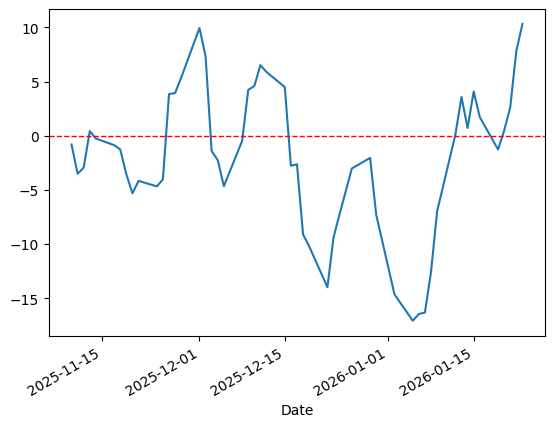

In [21]:
RS = RS_week('003670')

RS.plot()

plt.axhline(0, color='red', linestyle='--', linewidth=1);

# KOSPI 기업 전체 RS 

In [5]:
df_corp = fdr.StockListing('KRX')

In [6]:
kospi_df = df_corp[df_corp['Market'] == 'KOSPI']

In [7]:
no_data= []
dic_code = {}

for i,j in zip(kospi_df['Code'],kospi_df['Name']):
    try:
        prices = RS_week(i)
        if not prices.empty and prices.iloc[-1]>=0:
            dic_code[i] = j 
    except:
        no_data.append(i)

In [ ]:
# for idx,s in enumerate(no_data):
#     print(idx,s)

In [ ]:
today_str = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

df_rs_etfs= pd.DataFrame(list(dic_code.items()), columns=['Ticker', 'Name'])

df_rs_etfs.to_excel(f"{today_str}_corp_list.xlsx", index=False)

print("엑셀 파일 저장 완료!")

     Ticker      Name
0    005380       현대차
1    373220  LG에너지솔루션
2    000270        기아
3    028260      삼성물산
4    105560      KB금융
..      ...       ...
325  010640      진양폴리
326  009310    참엔지니어링
327  090355    노루페인트우
328  014285     금강공업우
329  002787   진흥기업2우B

[330 rows x 2 columns]
